# 1. Collecte des données

In [505]:
# retourne le chemin du repertoire
print(os.getcwd())

C:\Users\HP\Documents


In [507]:
import camelot as cam
import pandas as pd

In [508]:
import os

data_path = os.path.join(os.getcwd(), "rapport_IDI_2023.pdf")
print("Chemin utilisé :", data_path)
print("Existe ? ", os.path.exists(data_path))

data_path = "C:/Users/HP/OneDrive/Documents/GitHub/moncode/Projet-Data-Analyst/projet_idt/rapport/rapport_IDI_2023.pdf"
pdf = cam.read_pdf(data_path, pages="20", flavor="stream")
pdf


Chemin utilisé : C:\Users\HP\Documents\rapport_IDI_2023.pdf
Existe ?  False


<TableList n=1>

In [509]:
df = pdf[0].df

In [510]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Table 3: IDI 2023 scores,,,,,,,,,,,,,
1,,,,,IDI score and,,,,,,,IDI score and,,
2,,Region,Income\nGroup,,group average,,,,Region,Income\nGroup,,group average,,
3,,,,IDI,| Income,Univ.,M.,,,,IDI,| Income,Univ.,M.
4,Economy,,,Score,| Region,score,score,Economy,,,Score,| Region,score,score
5,Afghanistan,ASP,LI,28.9,,17.7,40.1,Lao P.D.R.,ASP,LMI,64.6,,59.6,69.6
6,Albania,EUR,UMI,81.6,,74.8,88.3,Latvia,EUR,HI,93.8,,90.2,97.5
7,Algeria,ARB,LMI,77.8,,72.3,83.2,Lebanon,ARB,LMI,76.1,,74.5,77.7
8,Andorra,EUR,HI,87.2,,85.5,88.8,Lesotho,AFR,LMI,44.3,,30.7,57.9
9,Angola,AFR,LMI,44.1,,31.3,56.9,Libya,ARB,UMI,79.4,,85.1,73.7


In [511]:
df = pdf[0].df

# Affiche les lignes d'en-tête
for i in range(5):
    print(f"Ligne {i} :", df.iloc[i].tolist())


Ligne 0 : ['Table 3: IDI 2023 scores', '', '', '', '', '', '', '', '', '', '', '', '', '']
Ligne 1 : ['', '', '', '', 'IDI score and', '', '', '', '', '', '', 'IDI score and', '', '']
Ligne 2 : ['', 'Region', 'Income\nGroup', '', 'group average', '', '', '', 'Region', 'Income\nGroup', '', 'group average', '', '']
Ligne 3 : ['', '', '', 'IDI', '| Income', 'Univ.', 'M.', '', '', '', 'IDI', '| Income', 'Univ.', 'M.']
Ligne 4 : ['Economy', '', '', 'Score', '| Region', 'score', 'score', 'Economy', '', '', 'Score', '| Region', 'score', 'score']


In [512]:
colonnes = ["Economy", "Region", "Income Group", "IDI Score", "Region Score", "Income Score"]

In [513]:
# Supprime les lignes inutiles (lignes d'en-tête désorganisées)
df_clean = df.iloc[5:].reset_index(drop=True)

# Reprend les colonnes utiles (les 7 premières pour chaque bloc de pays)
left_block = df_clean.iloc[:, 0:7]
right_block = df_clean.iloc[:, 7:14]

# Applique les noms de colonnes
colonnes = ["Economy", "Region", "Income Group", "IDI Score", "Blank", "Region Score", "Income Score"]
left_block.columns = colonnes
right_block.columns = colonnes

# Supprime la colonne vide
left_block = left_block.drop(columns=["Blank"])
right_block = right_block.drop(columns=["Blank"])

# Combine les deux blocs
df = pd.concat([left_block, right_block], axis=0).reset_index(drop=True)

# Affiche les 10 premières lignes
df.head(10)

,Economy,Region,Income Group,IDI Score,Region Score,Income Score
0,Afghanistan,ASP,LI,28.9,17.7,40.1
1,Albania,EUR,UMI,81.6,74.8,88.3
2,Algeria,ARB,LMI,77.8,72.3,83.2
3,Andorra,EUR,HI,87.2,85.5,88.8
4,Angola,AFR,LMI,44.1,31.3,56.9
5,Antigua and Barbuda,AMS,HI,79.7,71.7,87.8
6,Argentina,AMS,UMI,81.5,78.5,84.5
7,Armenia,CIS,UMI,85.1,79.3,90.8
8,Australia,ASP,HI,94.0,93.8,94.2
9,Austria,EUR,HI,92.5,89.2,95.8


In [514]:
# Informations sur mon dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Economy       170 non-null    object
 1   Region        170 non-null    object
 2   Income Group  170 non-null    object
 3   IDI Score     170 non-null    object
 4   Region Score  170 non-null    object
 5   Income Score  170 non-null    object
dtypes: object(6)
memory usage: 8.1+ KB


### 2. Nettoyage de la base de données

In [516]:
# Résumé global
print(df.isnull().sum())

# Ou version plus lisible avec pourcentages :
missing = df.isnull().mean() * 100
print(missing[missing > 0])  # affiche uniquement les colonnes concernées


Economy         0
Region          0
Income Group    0
IDI Score       0
Region Score    0
Income Score    0
dtype: int64
Series([], dtype: float64)


In [517]:
# Vérifier s'il y a des lignes dupliquées
print("Nombre de doublons :", df.duplicated().sum())

# Voir les doublons si besoin
df[df.duplicated()]


Nombre de doublons : 0


,Economy,Region,Income Group,IDI Score,Region Score,Income Score


In [518]:
# Suppression des doublons
df = df.drop_duplicates()

### 2. Nettoyage des trois colonnes numériques en convertissant le contenu en numérique:

In [520]:
colonnes_scores = ["IDI Score", "Region Score", "Income Score"]

for col in colonnes_scores:
    df[col] = df[col].replace('', pd.NA)  # remplace les chaînes vides
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convertit en float

In [521]:
# Combien de valeurs manquantes dans chaque colonne
print(df_final[colonnes_scores].isna().sum())

IDI Score       1
Region Score    1
Income Score    1
dtype: int64


### 3. Scores hors bornes (ex : IDI > 100 ou < 0)

#### Rechercher les scores IDI anormaux

In [524]:
x = df[df["IDI Score"].astype(float) > 100]
y = df[df["IDI Score"].astype(float) < 0]
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Economy       0 non-null      object 
 1   Region        0 non-null      object 
 2   Income Group  0 non-null      object 
 3   IDI Score     0 non-null      float64
 4   Region Score  0 non-null      float64
 5   Income Score  0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Economy       0 non-null      object 
 1   Region        0 non-null      object 
 2   Income Group  0 non-null      object 
 3   IDI Score     0 non-null      float64
 4   Region Score  0 non-null      float64
 5   Income Score  0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 0.0+ bytes


In [525]:
df["Income Group"].unique()  # voir les valeurs possibles

# vérifier si des valeurs inattendues s’y trouvent
groupes_valides = ["LI", "LMI", "UMI", "HI"]
df[~df["Income Group"].isin(groupes_valides)]

,Economy,Region,Income Group,IDI Score,Region Score,Income Score
165,Venezuela,AMS,n.a.,64.2,58.1,70.4
169,,,,NaN,NaN,NaN


In [526]:
 # voir les doublons potentiels
df["Economy"].value_counts().head(170).sum()

170

In [527]:
colonnes_scores = ["IDI Score", "Region Score", "Income Score"]

# Nettoyage : chaînes vides -> NaN + conversion en float
for col in colonnes_scores:
    df[col] = df[col].replace('', pd.NA)
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in colonnes_scores:
    moyenne = df[col].mean()
    df[col] = df[col].fillna(moyenne)

In [528]:
# Remplace les vides ('') par NaN dans la colonne 'Economy' si besoin
df["Economy"] = df["Economy"].replace('', pd.NA)

# Supprime les lignes où la colonne 'Economy' est vide ou NaN
df = df.dropna(subset=["Economy"])

### Vérifier combien de lignes ont été supprimées

In [530]:
nb_lignes = df.shape[0]
print("Nombre de lignes après suppression des pays manquants :", nb_lignes)

Nombre de lignes après suppression des pays manquants : 169


# Analyse exploratoire des données

In [532]:
# Résumé statistique
print(df.describe())

        IDI Score  Region Score  Income Score
count  169.000000    169.000000    169.000000
mean    72.835503     67.782840     77.887574
std     20.293863     23.291021     18.521279
min     20.000000      7.000000     30.200000
25%     63.600000     53.600000     70.400000
50%     79.000000     75.000000     85.900000
75%     87.400000     84.500000     91.600000
max     98.200000    100.000000     99.300000


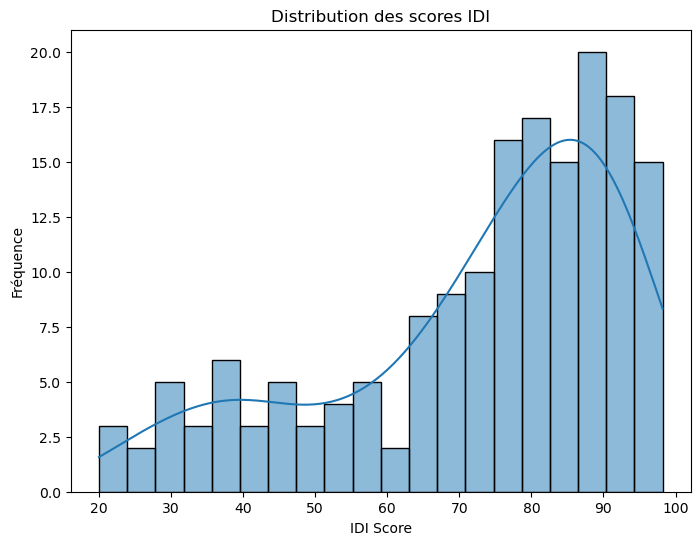

In [533]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme pour 'IDI Score'
plt.figure(figsize=(8,6))
sns.histplot(df['IDI Score'], bins=20, kde=True)
plt.title('Distribution des scores IDI')
plt.xlabel('IDI Score')
plt.ylabel('Fréquence')
plt.show()

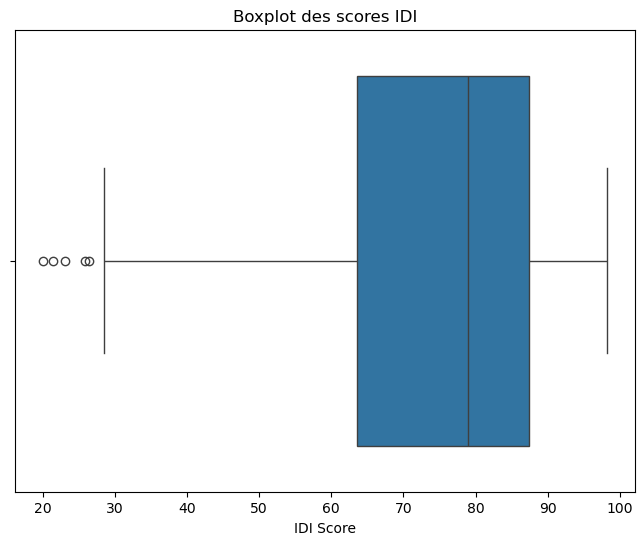

In [534]:
# Boxplot pour 'IDI Score'
plt.figure(figsize=(8,6))
sns.boxplot(x=df['IDI Score'])
plt.title('Boxplot des scores IDI')
plt.xlabel('IDI Score')
plt.show()

### 3. Nuage de points entre deux variables (par exemple, IDI Score vs Region Score)

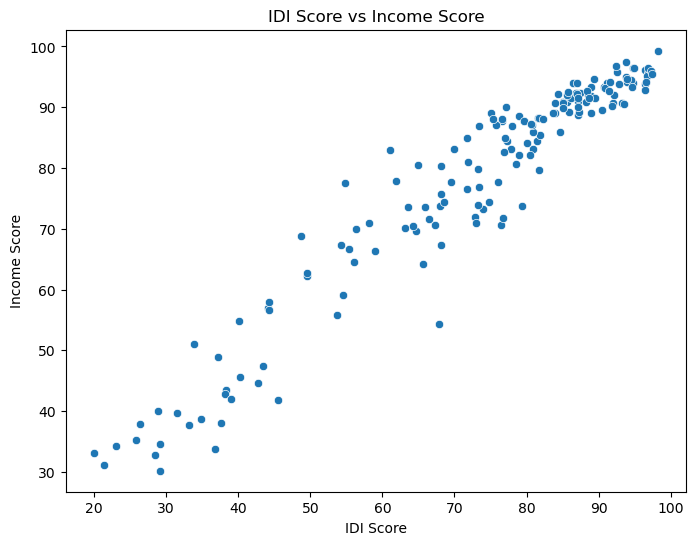

In [536]:
# Nuage de points
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['IDI Score'], y=df['Income Score'])
plt.title('IDI Score vs Income Score')
plt.xlabel('IDI Score')
plt.ylabel('Income Score')
plt.show()

### 4. Analyse des valeurs manquantes (si elles existent toujours)

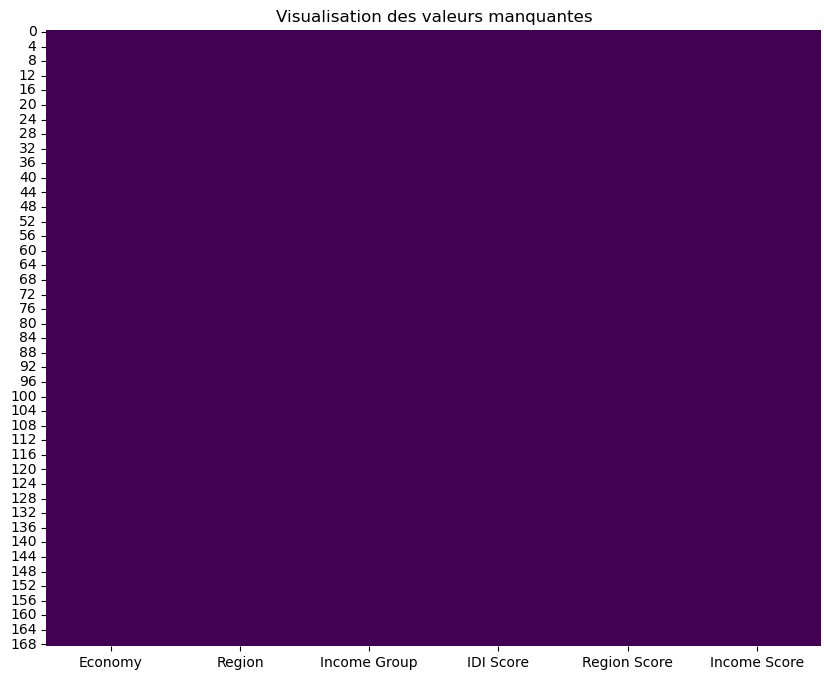

In [538]:
import seaborn as sns

# Heatmap pour afficher les NaN
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisation des valeurs manquantes")
plt.show()

### 5. Analyser les pays par score (ex : top 10 des pays avec meilleur IDI Score)

In [541]:
# Trier les pays par score IDI
top_pays_idi = df[['Economy', 'IDI Score']].sort_values(by='IDI Score', ascending=False).head(10)
print(top_pays_idi)

                  Economy  IDI Score
83                 Kuwait       98.2
138             Singapore       97.4
125                 Qatar       97.3
44                Denmark       96.9
52                Estonia       96.9
56                Finland       96.7
161         United States       96.6
67       Hong Kong, China       96.5
12                Bahrain       96.5
159  United Arab Emirates       96.4


### 6. Visualiser les top pays par score (Barplot)

C:\Users\HP\AppData\Local\Temp\ipykernel_3464\1364422642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IDI Score', y='Economy', data=top_pays_idi, palette='Blues_d')


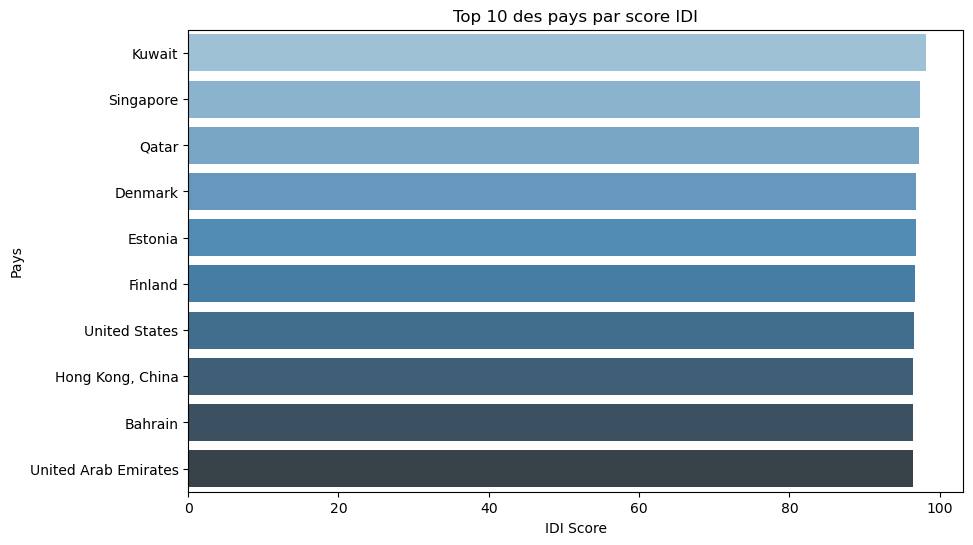

In [543]:
# Barplot pour les top pays par IDI Score
plt.figure(figsize=(10, 6))
sns.barplot(x='IDI Score', y='Economy', data=top_pays_idi, palette='Blues_d')
plt.title("Top 10 des pays par score IDI")
plt.xlabel("IDI Score")
plt.ylabel("Pays")
plt.show()

### 7. Explore d'autres relations intéressantes

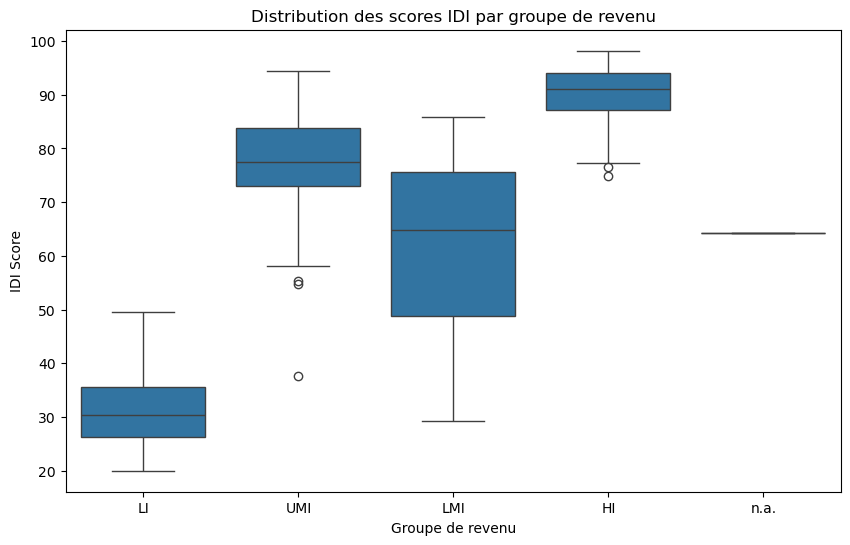

In [545]:
# Boxplot des scores IDI selon les groupes de revenu
plt.figure(figsize=(10,6))
sns.boxplot(x='Income Group', y='IDI Score', data=df)
plt.title("Distribution des scores IDI par groupe de revenu")
plt.xlabel("Groupe de revenu")
plt.ylabel("IDI Score")
plt.show()

### 8. Analyser des tendances temporelles (si tu as une dimension temporelle)

In [547]:
# Graphique des scores IDI dans le temps
#plt.figure(figsize=(10,6))
#sns.lineplot(data=df, x='Year', y='IDI Score', hue='Economy')
#plt.title('Evolution des scores IDI dans le temps')
#plt.xlabel('Année')
#plt.ylabel('IDI Score')
#plt.show()

### 9. Matrice de corrélation

In [549]:
# Sélectionner les colonnes quantitatives
cols = ['IDI Score', 'Region Score', 'Income Score']

# Calculer la matrice de corrélation
corr_matrix = df[cols].corr()

# Afficher la matrice de corrélation
print(corr_matrix)


              IDI Score  Region Score  Income Score
IDI Score      1.000000      0.976860      0.963156
Region Score   0.976860      1.000000      0.883352
Income Score   0.963156      0.883352      1.000000


Interprétation :

    1 : Parfaitement corrélé avec soi-même.

    0.75, 0.68, etc. : Indique le degré de corrélation linéaire entre les deux variables.

        Une corrélation positive forte (par exemple 0.75) indique que les deux variables augmentent ensemble.

        Une corrélation faible ou nulle (proche de 0) indique peu ou pas de relation entre les variables.



### 10. Visualisation de la corrélation avec une heatmap :

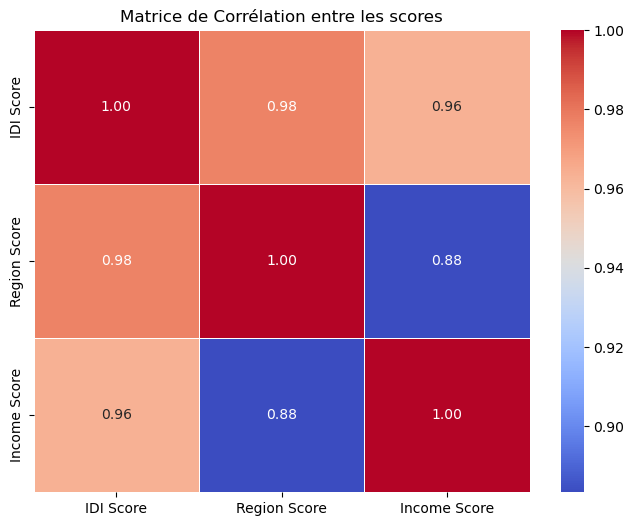

In [552]:
# Heatmap de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation entre les scores")
plt.show()


### 11. Création de la colonne continent
    a. Associer les régions à leurs continents.

    b. Créer une nouvelle colonne représentant le continent.

    c. Groupby pour obtenir des statistiques par continent.

In [554]:
# Dictionnaire pour associer les régions aux continents
region_to_continent = {
    'AFR': 'Africa',
    'AMS': 'Americas',
    'ARB': 'Arab States',
    'ASP': 'Asia-Pacific',
    'CIS': 'Commonwealth of Independent States',
    'EUR': 'Europe'
}

# Créer une nouvelle colonne 'Continent' en fonction de la colonne 'Region'
df['Continent'] = df['Region'].map(region_to_continent)


### 12. Calculer les statistiques descriptives par continent

Maintenant que nous avons ajouté une colonne pour les continents, on peut utiliser groupby() pour calculer des statistiques descriptives sur les variables quantitatives.

In [556]:
# Statistiques descriptives par continent
statistics_by_continent = df.groupby('Continent')[['IDI Score', 'Region Score', 'Income Score']].describe()

# Afficher les statistiques
print(statistics_by_continent)


                                   IDI Score                              \
                                       count       mean        std   min   
Continent                                                                  
Africa                                  36.0  47.400000  18.406676  20.0   
Americas                                32.0  74.790625  10.442418  54.8   
Arab States                             20.0  74.525000  20.409644  21.4   
Asia-Pacific                            31.0  74.877419  18.079891  28.9   
Commonwealth of Independent States       7.0  85.028571   3.674559  79.0   
Europe                                  43.0  88.432558   4.995413  76.6   

                                                               Region Score  \
                                       25%    50%    75%   max        count   
Continent                                                                     
Africa                              33.625  41.45  66.05  81.7         36.0   

### 13. Visualisation des statistiques par continent

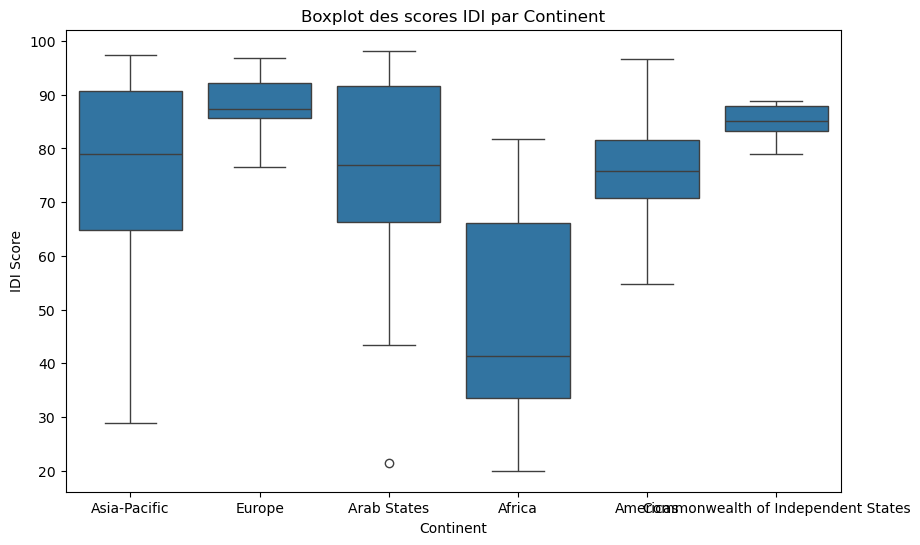

In [558]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Continent', y='IDI Score', data=df)
plt.title('Boxplot des scores IDI par Continent')
plt.show()

### Barplot pour la moyenne :

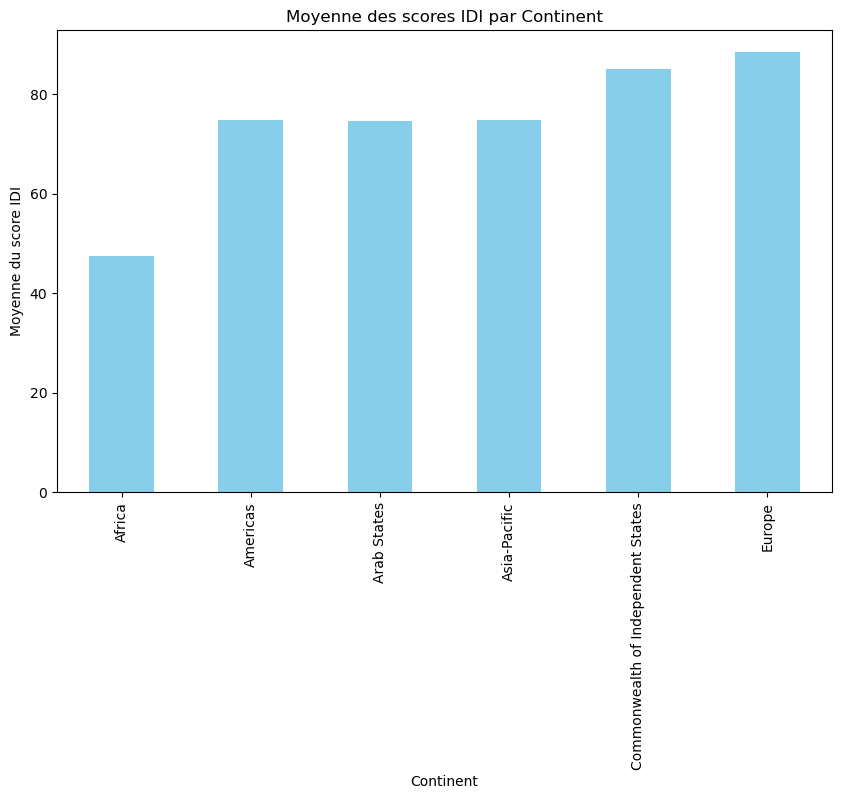

In [560]:
# Moyenne des scores IDI par continent
mean_scores = df.groupby('Continent')['IDI Score'].mean()

# Affichage du barplot
plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar', color='skyblue')
plt.title('Moyenne des scores IDI par Continent')
plt.ylabel('Moyenne du score IDI')
plt.show()

### 14. Tendance linéaire

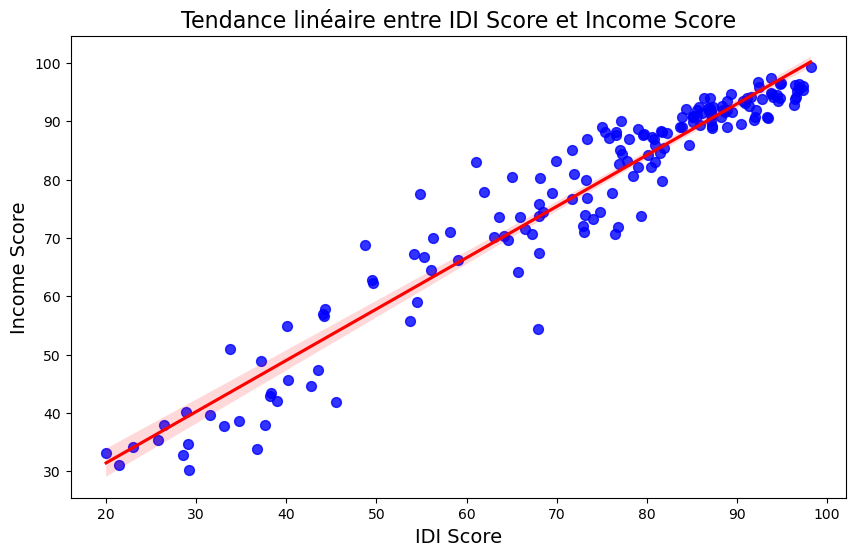

In [562]:
# Tracer le scatter plot avec la droite de régression
plt.figure(figsize=(10, 6))
sns.regplot(x='IDI Score', y='Income Score', data=df, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})

# Ajouter les titres et labels
plt.title('Tendance linéaire entre IDI Score et Income Score', fontsize=16)
plt.xlabel('IDI Score', fontsize=14)
plt.ylabel('Income Score', fontsize=14)
plt.show()


In [563]:
# Calculer la corrélation entre IDI Score et Income Score
correlation = df[['IDI Score', 'Income Score']].corr()

# Afficher la corrélation
print(correlation)


              IDI Score  Income Score
IDI Score      1.000000      0.963156
Income Score   0.963156      1.000000


### 15. Analyse de la régression linéaire simple :

In [565]:
import statsmodels.api as sm

# Sélection des variables indépendantes et dépendantes
X = df['IDI Score']
y = df['Income Score']

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Créer le modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Résumé des résultats
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Income Score   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2142.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           3.63e-97
Time:                        01:04:27   Log-Likelihood:                -510.66
No. Observations:                 169   AIC:                             1025.
Df Residuals:                     167   BIC:                             1032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8631      1.436      9.655      0.0

### 16. Analyse de la distribution des erreurs (Residuals) :

Une fois que tu as ajusté ton modèle de régression, il est important de vérifier si les résidus (erreurs de prédiction) suivent une distribution normale. Si les résidus sont bien distribués, cela indique que ton modèle de régression est bien spécifié.

Tu peux visualiser les résidus avec un histogramme et un graphique de dispersion des résidus :



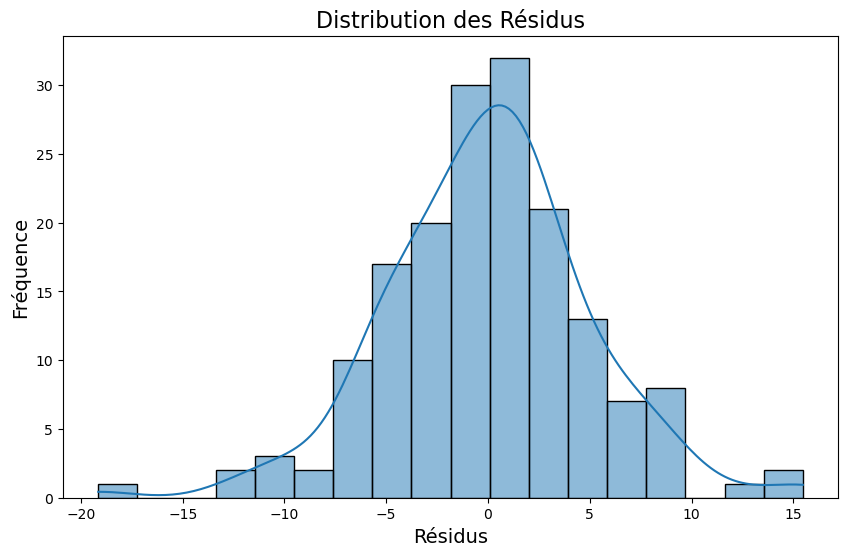

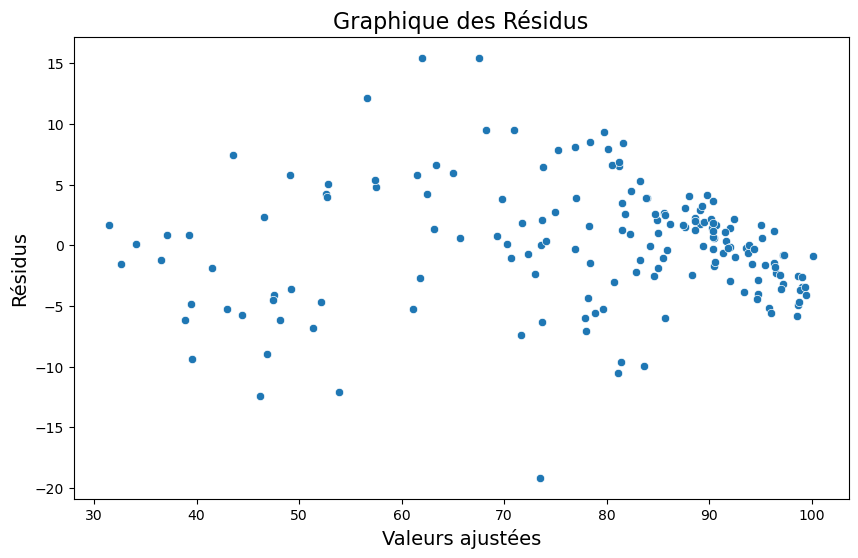

In [567]:
# Calculer les résidus
residuals = model.resid

# Afficher un histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus', fontsize=16)
plt.xlabel('Résidus', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.show()

# Graphique de dispersion des résidus
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.title('Graphique des Résidus', fontsize=16)
plt.xlabel('Valeurs ajustées', fontsize=14)
plt.ylabel('Résidus', fontsize=14)
plt.show()


### 17. Vérification de la multicolinéarité :

Si tu as plusieurs variables explicatives dans un modèle de régression (ce qui est le cas dans les régressions multiples), il est important de vérifier la multicolinéarité, c'est-à-dire si les variables indépendantes sont fortement corrélées entre elles. Cela peut fausser les résultats de la régression.

Tu peux utiliser le Variance Inflation Factor (VIF) pour évaluer la multicolinéarité :

In [569]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Créer un DataFrame avec les variables explicatives
X = df[['IDI Score', 'Income Score']]
X = sm.add_constant(X)

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print(vif_data)


       Variable        VIF
0         const  21.749631
1     IDI Score  13.825413
2  Income Score  13.825413


Region
AFR    1706.4
AMS    2393.3
ARB    1490.5
ASP    2321.2
CIS     595.2
EUR    3802.6
Name: IDI Score, dtype: float64


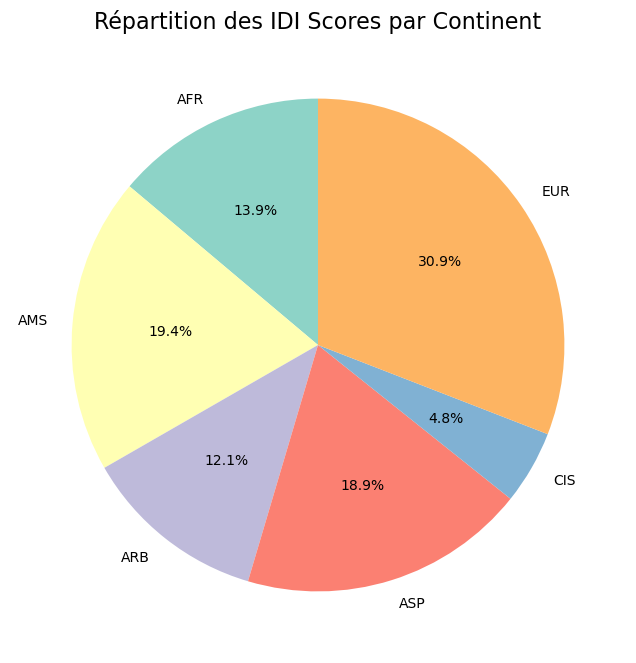

In [570]:
# Grouper par continent et calculer la somme des IDI Scores
idi_scores_par_continent = df.groupby('Region')['IDI Score'].sum()

# Afficher les résultats
print(idi_scores_par_continent)

# Créer un diagramme circulaire
plt.figure(figsize=(8, 8))
idi_scores_par_continent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(idi_scores_par_continent)))

# Ajouter un titre
plt.title('Répartition des IDI Scores par Continent', fontsize=16)
plt.ylabel('')  # Enlever le label de l'axe des ordonnées
plt.show()


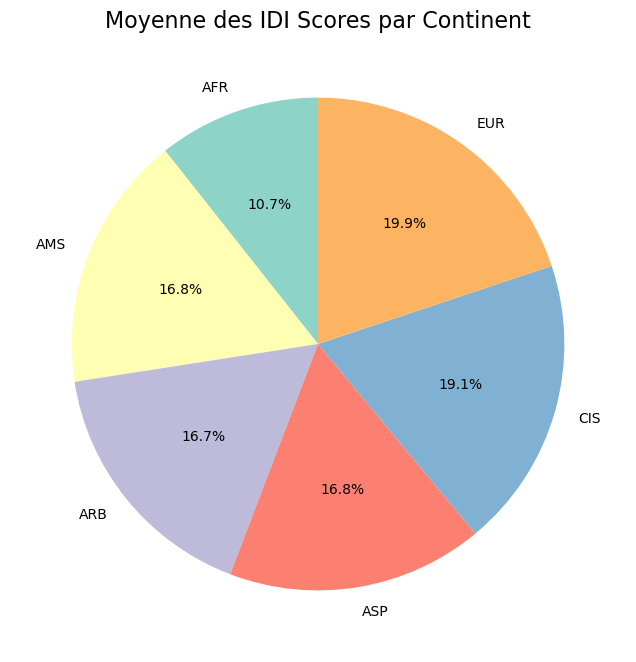

In [571]:
# Calcul de la moyenne des IDI Scores par continent
idi_scores_par_continent = df.groupby('Region')['IDI Score'].mean()

# Créer un diagramme circulaire pour les moyennes
plt.figure(figsize=(8, 8))
idi_scores_par_continent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(idi_scores_par_continent)))

# Ajouter un titre
plt.title('Moyenne des IDI Scores par Continent', fontsize=16)
plt.ylabel('')  # Enlever le label de l'axe des ordonnées
plt.show()


In [572]:
# Dictionnaire de correspondance entre sigles et noms de continents
region_mapping = {
    'AFR': 'Africa',
    'AMS': 'Americas',
    'ARB': 'Arab States',
    'ASP': 'Asia-Pacific',
    'CIS': 'Commonwealth of Independent States',
    'EUR': 'Europe'
}


In [573]:
# Remplacer les sigles des régions par les noms complets
df['Region'] = df['Region'].map(region_mapping)

# Vérifier le changement
print(df['Region'].unique())


['Asia-Pacific' 'Europe' 'Arab States' 'Africa' 'Americas'
 'Commonwealth of Independent States']


In [574]:
# Grouper par continent et calculer la somme des IDI Scores
idi_scores_par_continent = df.groupby('Region')['IDI Score'].sum()

# Afficher les résultats
print(idi_scores_par_continent)


Region
Africa                                1706.4
Americas                              2393.3
Arab States                           1490.5
Asia-Pacific                          2321.2
Commonwealth of Independent States     595.2
Europe                                3802.6
Name: IDI Score, dtype: float64


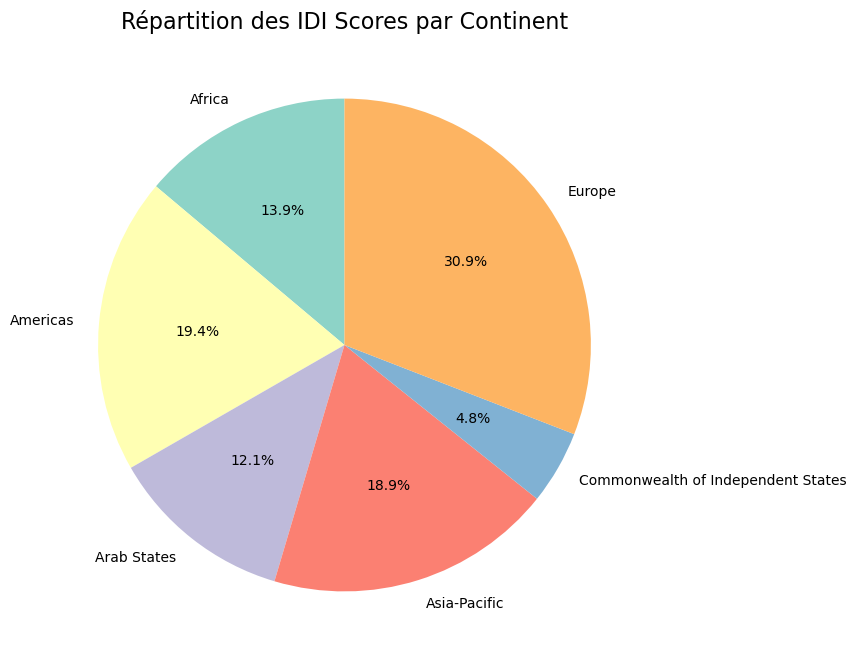

In [576]:
# Créer un diagramme circulaire avec les noms de continents
plt.figure(figsize=(8, 8))
idi_scores_par_continent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(idi_scores_par_continent)))

# Ajouter un titre
plt.title('Répartition des IDI Scores par Continent', fontsize=16)
plt.ylabel('')  # Enlever le label de l'axe des ordonnées
plt.show()


In [577]:
from sklearn.preprocessing import StandardScaler

# Sélection des variables quantitatives (par exemple IDI Score et Income Score)
X = df[['IDI Score', 'Income Score', 'Region Score']]  # Ajouter d'autres variables si nécessaire

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [578]:
from sklearn.decomposition import PCA

# Appliquer l'ACP pour réduire la dimension à 2 ou 3 dimensions (selon le cas)
pca = PCA(n_components=2)  # Pour une réduction à 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Afficher la variance expliquée par chaque composante
print("Variance expliquée par chaque composante : ", pca.explained_variance_ratio_)
print("Variance totale expliquée : ", sum(pca.explained_variance_ratio_))


Variance expliquée par chaque composante :  [0.96094526 0.03905411]
Variance totale expliquée :  0.9999993669660159


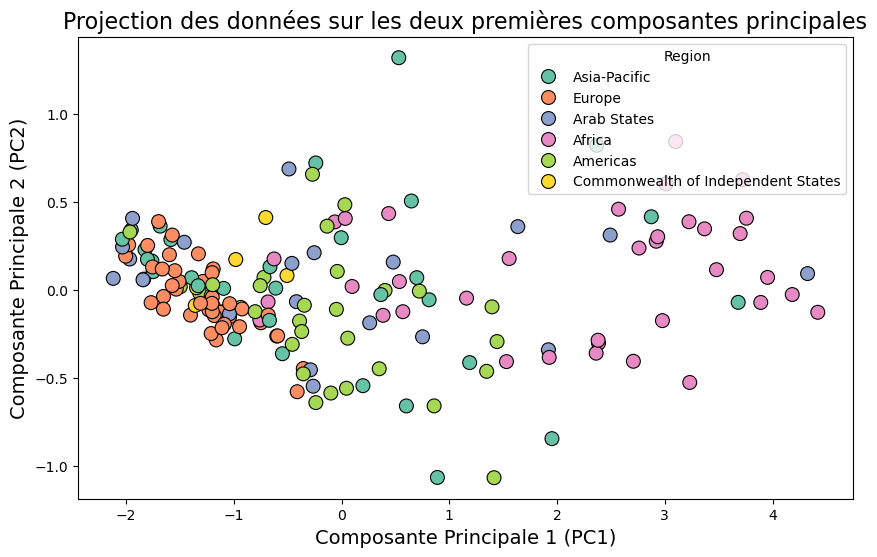

In [588]:
# Créer un DataFrame avec les deux premières composantes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Ajouter la colonne de 'Region' pour la coloration (si souhaité)
df_pca['Region'] = df['Region']

# Visualiser les résultats de l'ACP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='Region', palette='Set2', s=100, edgecolor='k')
plt.title('Projection des données sur les deux premières composantes principales', fontsize=16)
plt.xlabel('Composante Principale 1 (PC1)', fontsize=14)
plt.ylabel('Composante Principale 2 (PC2)', fontsize=14)
plt.legend(title='Region')
plt.show()


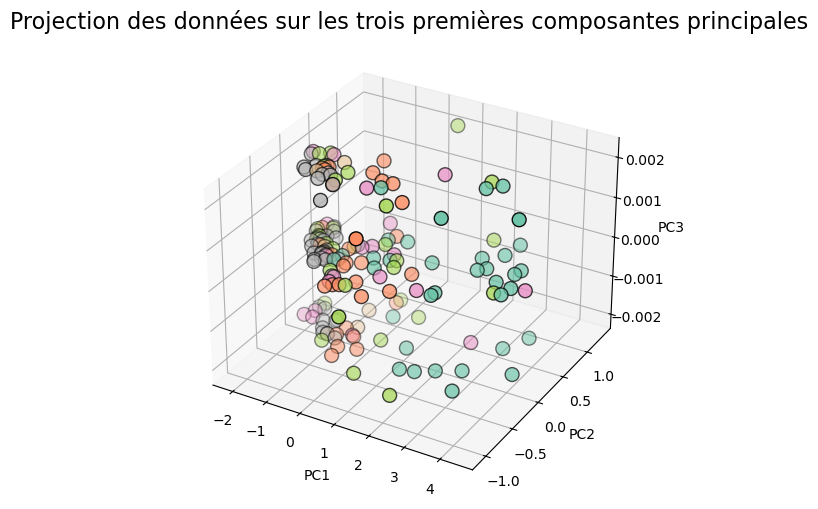

In [589]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer l'ACP pour 3 composantes principales
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Créer un DataFrame pour les 3 composantes principales
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Region'] = df['Region']

# Visualiser en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D, en utilisant les trois composantes
ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['Region'].astype('category').cat.codes, cmap='Set2', s=100, edgecolor='k')

# Ajouter des labels pour les axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Titre du graphique
plt.title('Projection des données sur les trois premières composantes principales', fontsize=16)

# Afficher le graphique
plt.show()


In [590]:
# Afficher les poids des variables dans chaque composante principale
print("Poids des variables dans chaque composante principale :")
print(pca.components_)

Poids des variables dans chaque composante principale :
[[-0.5888687  -0.57004352 -0.57296077]
 [ 0.05293649 -0.73458977  0.67644334]]


In [592]:
import scipy.stats as stats

# Exemple de données (assurez-vous que votre dataframe 'df' contient les colonnes appropriées)
# df = pd.read_csv('data.csv')  # Si vous devez charger les données depuis un fichier

# Séparer les données par région
regions = df['Region'].unique()

# Créer une liste pour stocker les échantillons de chaque groupe (ici, chaque région)
grouped_data = [df[df['Region'] == region]['IDI Score'] for region in regions]

# Appliquer l'ANOVA à un facteur
f_stat, p_value = stats.f_oneway(*grouped_data)

# Afficher les résultats
print(f"Statistique F : {f_stat}")
print(f"Valeur p : {p_value}")


Statistique F : 33.567779110999794
Valeur p : 1.8327790692334044e-23


### Test post-hoc (si ANOVA est significative) :

Si tu trouves que l'ANOVA est significative, tu peux vouloir savoir quels groupes sont significativement différents. Un test post-hoc comme le test de Tukey peut être utilisé pour comparer les moyennes de chaque paire de groupes.

Voici comment effectuer un test de Tukey avec statsmo

dels :



In [596]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Effectuer le test de Tukey
tukey = pairwise_tukeyhsd(endog=df['IDI Score'],  # Variable dépendante
                          groups=df['Region'],    # Facteur
                          alpha=0.05)

# Afficher les résultats
print(tukey.summary())


                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                             group2               meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------------------------------------
                            Africa                           Americas  27.3906    0.0   17.258 37.5233   True
                            Africa                        Arab States   27.125    0.0  15.4939 38.7561   True
                            Africa                       Asia-Pacific  27.4774    0.0  17.2586 37.6962   True
                            Africa Commonwealth of Independent States  37.6286    0.0  20.4008 54.8563   True
                            Africa                             Europe  41.0326    0.0   31.611 50.4541   True
                          Americas                        Arab States  -0.2656    1.0 -12.1536 11.6223  False
          

### Classification

In [598]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [599]:
# Exemple de données (assurez-vous que votre dataframe 'df' contient les colonnes appropriées)
# df = pd.read_csv('data.csv')  # Si vous devez charger les données depuis un fichier

# Variables indépendantes (features)
X = df[['IDI Score', 'Income Score', 'Region Score']]  # Remplace par les colonnes de ton choix

# Variable cible (target)
y = df['Region']  # Remplace 'Region' par la colonne que tu souhaites prédire


In [600]:
# Diviser les données en 80% pour l'entraînement et 20% pour les tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données (mettre les caractéristiques sur la même échelle)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [609]:
# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [610]:
# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test_scaled)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Rapport de classification (précision, rappel, F-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.56
Confusion Matrix:
[[ 6  1  0  0  0  0]
 [ 1  1  0  2  0  2]
 [ 0  1  0  0  0  1]
 [ 3  0  0  2  0  3]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0 10]]
Classification Report:
                                    precision    recall  f1-score   support

                            Africa       0.60      0.86      0.71         7
                          Americas       0.33      0.17      0.22         6
                       Arab States       0.00      0.00      0.00         2
                      Asia-Pacific       0.50      0.25      0.33         8
Commonwealth of Independent States       0.00      0.00      0.00         1
                            Europe       0.59      1.00      0.74        10

                          accuracy                           0.56        34
                         macro avg       0.34      0.38      0.33        34
                      weighted avg       0.47      0.56      0.48        34



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 3. Explication des résultats :

    Accuracy : L'exactitude du modèle, c'est-à-dire la proportion de bonnes prédictions parmi l'ensemble des prédictions.

    Matrice de confusion : Montre le nombre de vrais positifs, faux positifs, vrais négatifs et faux négatifs.

    Classification Report : Fournit des mesures supplémentaires comme la précision, le rappel et le score F1 pour chaque classe (ici chaque Region).

In [613]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [614]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [615]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [629]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Diviser les données en variables indépendantes (features) et variable cible (target)
X = df[['IDI Score', 'Income Score', 'Region Score']]  # Remplace par tes colonnes
y = df['Region']  # Remplace par la variable que tu souhaites prédire

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données (mettre sur la même échelle)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et entraîner le modèle SVC avec probability=True
model = SVC(probability=True)
model.fit(X_train_scaled, y_train)


SVC(probability=True)

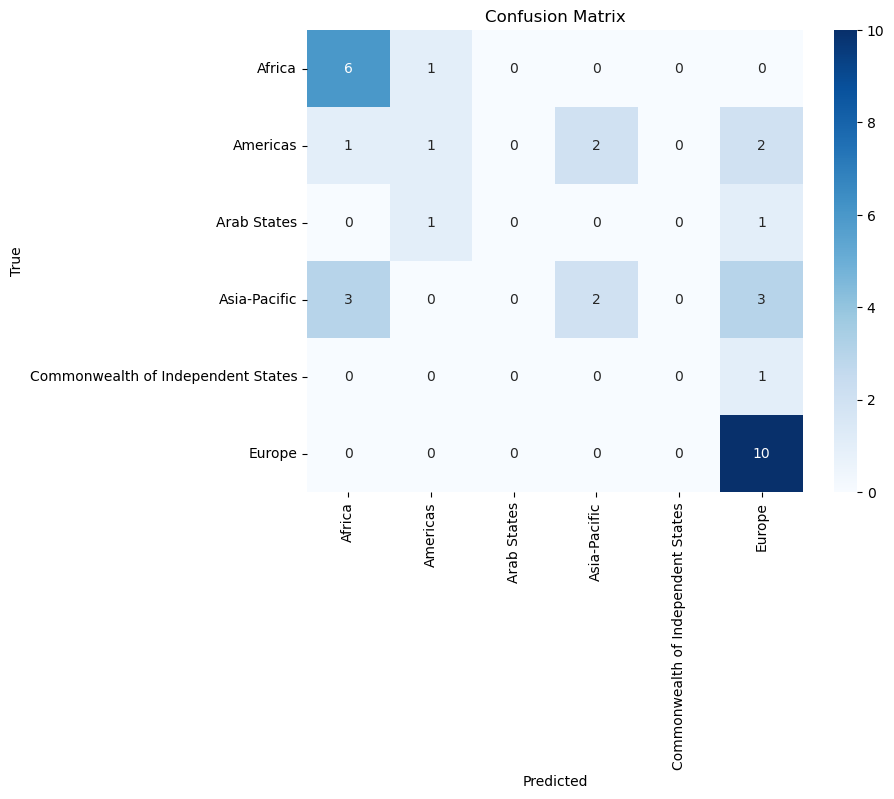

In [631]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

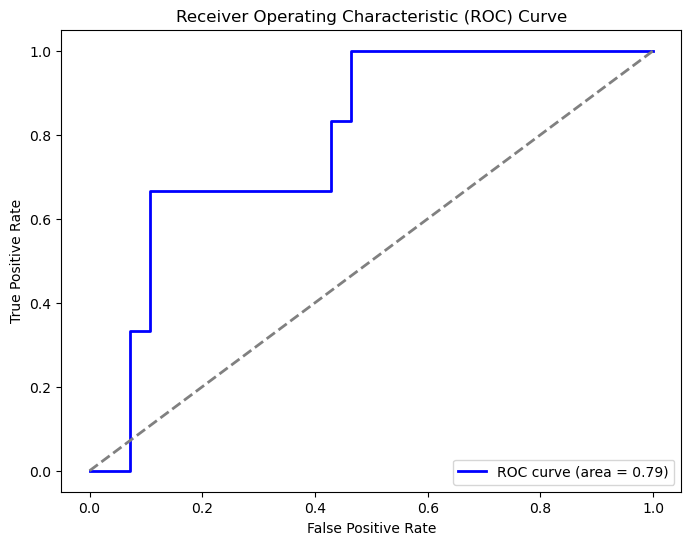

In [633]:
from sklearn.metrics import roc_curve, auc

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1], pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


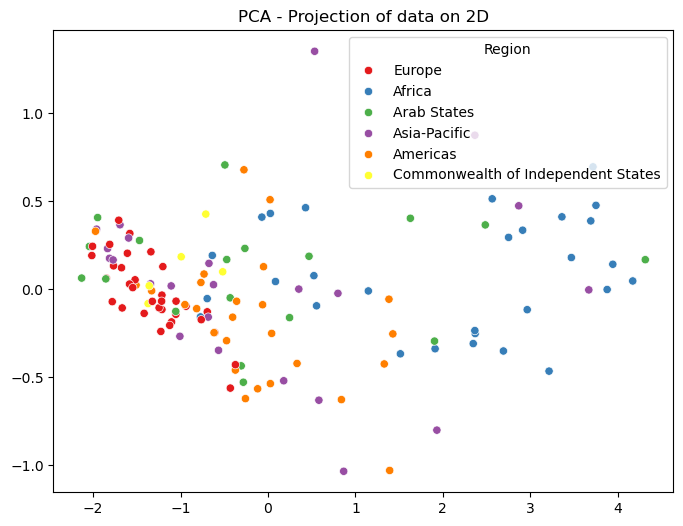

In [638]:
from sklearn.decomposition import PCA

# Réduire la dimensionnalité des données à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Afficher les données projetées en 2D, colorées par la classe
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='Set1')
plt.title('PCA - Projection of data on 2D')
plt.show()
